# Índice

1. [Importacion de datos, librerías y configuraciones.](#importacion-de-datos,-librerías-y-configuraciones)
2. [Quitamos Variables Irrelevantes](#quitamos-variables-irrelevantes)
3. [Exploración Inicial Antes de Agrupar](#exploración-inicial-antes-de-agrupar)
4. [Separamos información Clientes y Productos](#separamos-información-clientes-y-productos)


---
---
## Importacion de datos, librerías y configuraciones.

In [96]:
%load_ext autoreload
%autoreload 2

from config import *

df = pd.read_csv(f"{DATOS_RUTA_BASE}/Global_Superstore.csv", encoding='latin-1').reset_index(drop=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
---
## Quitamos Variables Irrelevantes

In [97]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
8746,19054,ES-2012-5843148,07-03-2012,10-03-2012,First Class,TS-21370,Todd Sumrall,Corporate,Orihuela,Valenciana,Spain,NaN,EU,South,FUR-BO-10003333,Furniture,Bookcases,"Sauder Stackable Bookrack, Traditional",438.84,3,0.00,65.79,38.43,Medium


#### Los 'Product ID' y los 'Customer ID' los voy a quitar dado que hay, en cuento a valores únicos, más cantidad de Ids que nombres de productos, cuando deberían ser la misma cantidad. 

In [98]:
df.drop(columns=['Row ID', 'Postal Code', 'Product ID', 'Customer ID'], inplace=True)
df.sample()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
43806,CA-2013-106950,03-09-2013,07-09-2013,Standard Class,Joe Elijah,Consumer,Charlotte,North Carolina,United States,US,South,Office Supplies,Binders,Heavy-Duty E-Z-D Binders,22.91,7,0.70,-17.57,1.45,High


#### Añadimos un columna con el precio del producto la cual viene de dividir 'Sales' entre la 'Quantity'.

In [99]:
df['unit value'] = round((df['Sales']/df['Quantity']), 2)
df.sample()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,unit value
2929,MX-2011-151365,05-12-2011,12-12-2011,Standard Class,Harold Engle,Corporate,Cuernavaca,Morelos,Mexico,LATAM,North,Technology,Copiers,"HP Fax Machine, Color",802.07,4,0.00,-1.61,101.64,Low,200.52


---
---
## Exploración Inicial Antes de Agrupar

In [100]:
sup_prep.exploracion_datos(df)

El número de filas es 51290 y el número de columnas es 21

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Sales,51290.00,246.49,487.57,0.44,30.76,85.05,251.05,22638.48
Quantity,51290.00,3.48,2.28,1.00,2.00,3.00,5.00,14.00
Discount,51290.00,0.14,0.21,0.00,0.00,0.00,0.20,0.85
Profit,51290.00,28.61,174.34,-6599.98,0.00,9.24,36.81,8399.98
Shipping Cost,51290.00,26.38,57.30,0.00,2.61,7.79,24.45,933.57
unit value,51290.00,71.66,113.58,0.34,11.80,29.40,82.16,3773.08



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Order Date,51290,1430,18-06-2014,135
Ship Date,51290,1464,22-11-2014,130
Ship Mode,51290,4,Standard Class,30775
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994
Market,51290,7,APAC,11002



----------

Los columnas con valores nulos y sus porcentajes son: 


,%_nulos



----------

Valores unicos que las variables


,index,0
0,Order ID,25035
1,Order Date,1430
2,Ship Date,1464
3,Ship Mode,4
4,Customer Name,795
5,Segment,3
6,City,3636
7,State,1094
8,Country,147
9,Market,7


In [101]:
df_plotear = df.drop(columns=['Order ID'])

In [102]:
vis = sup_prep.Visualizador(df_plotear)

6it [00:00, 21.24it/s]


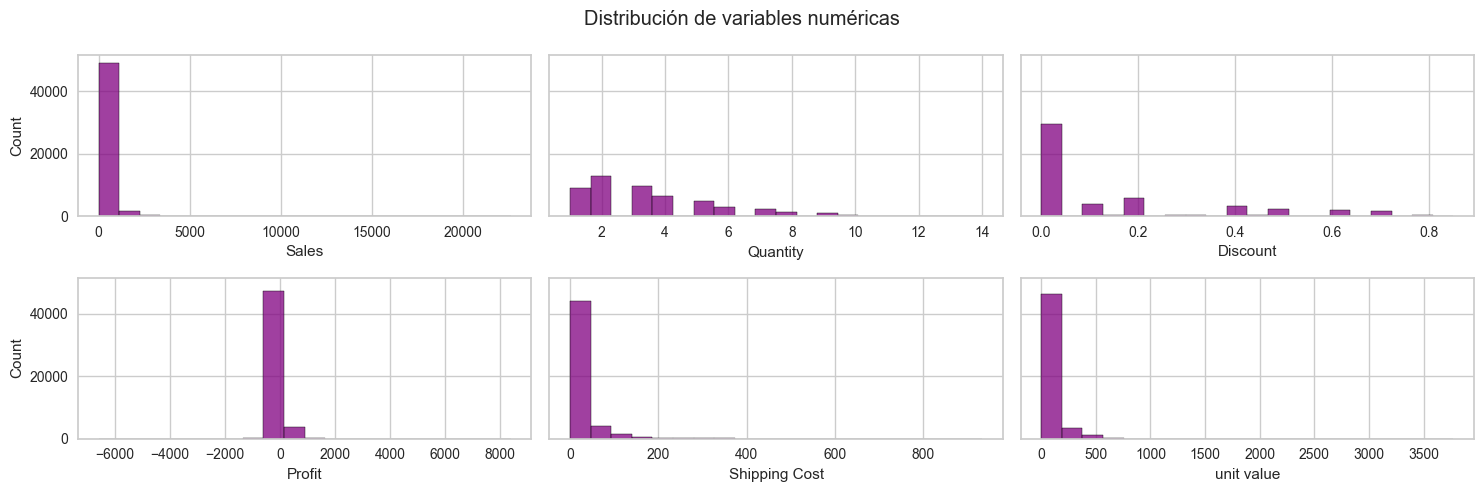

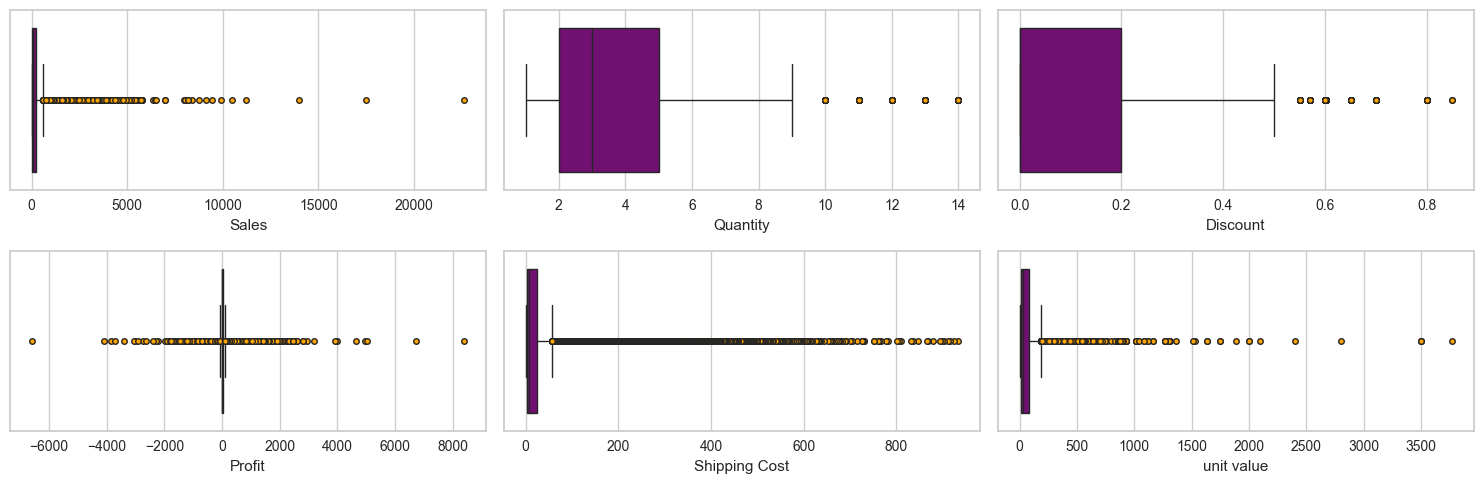

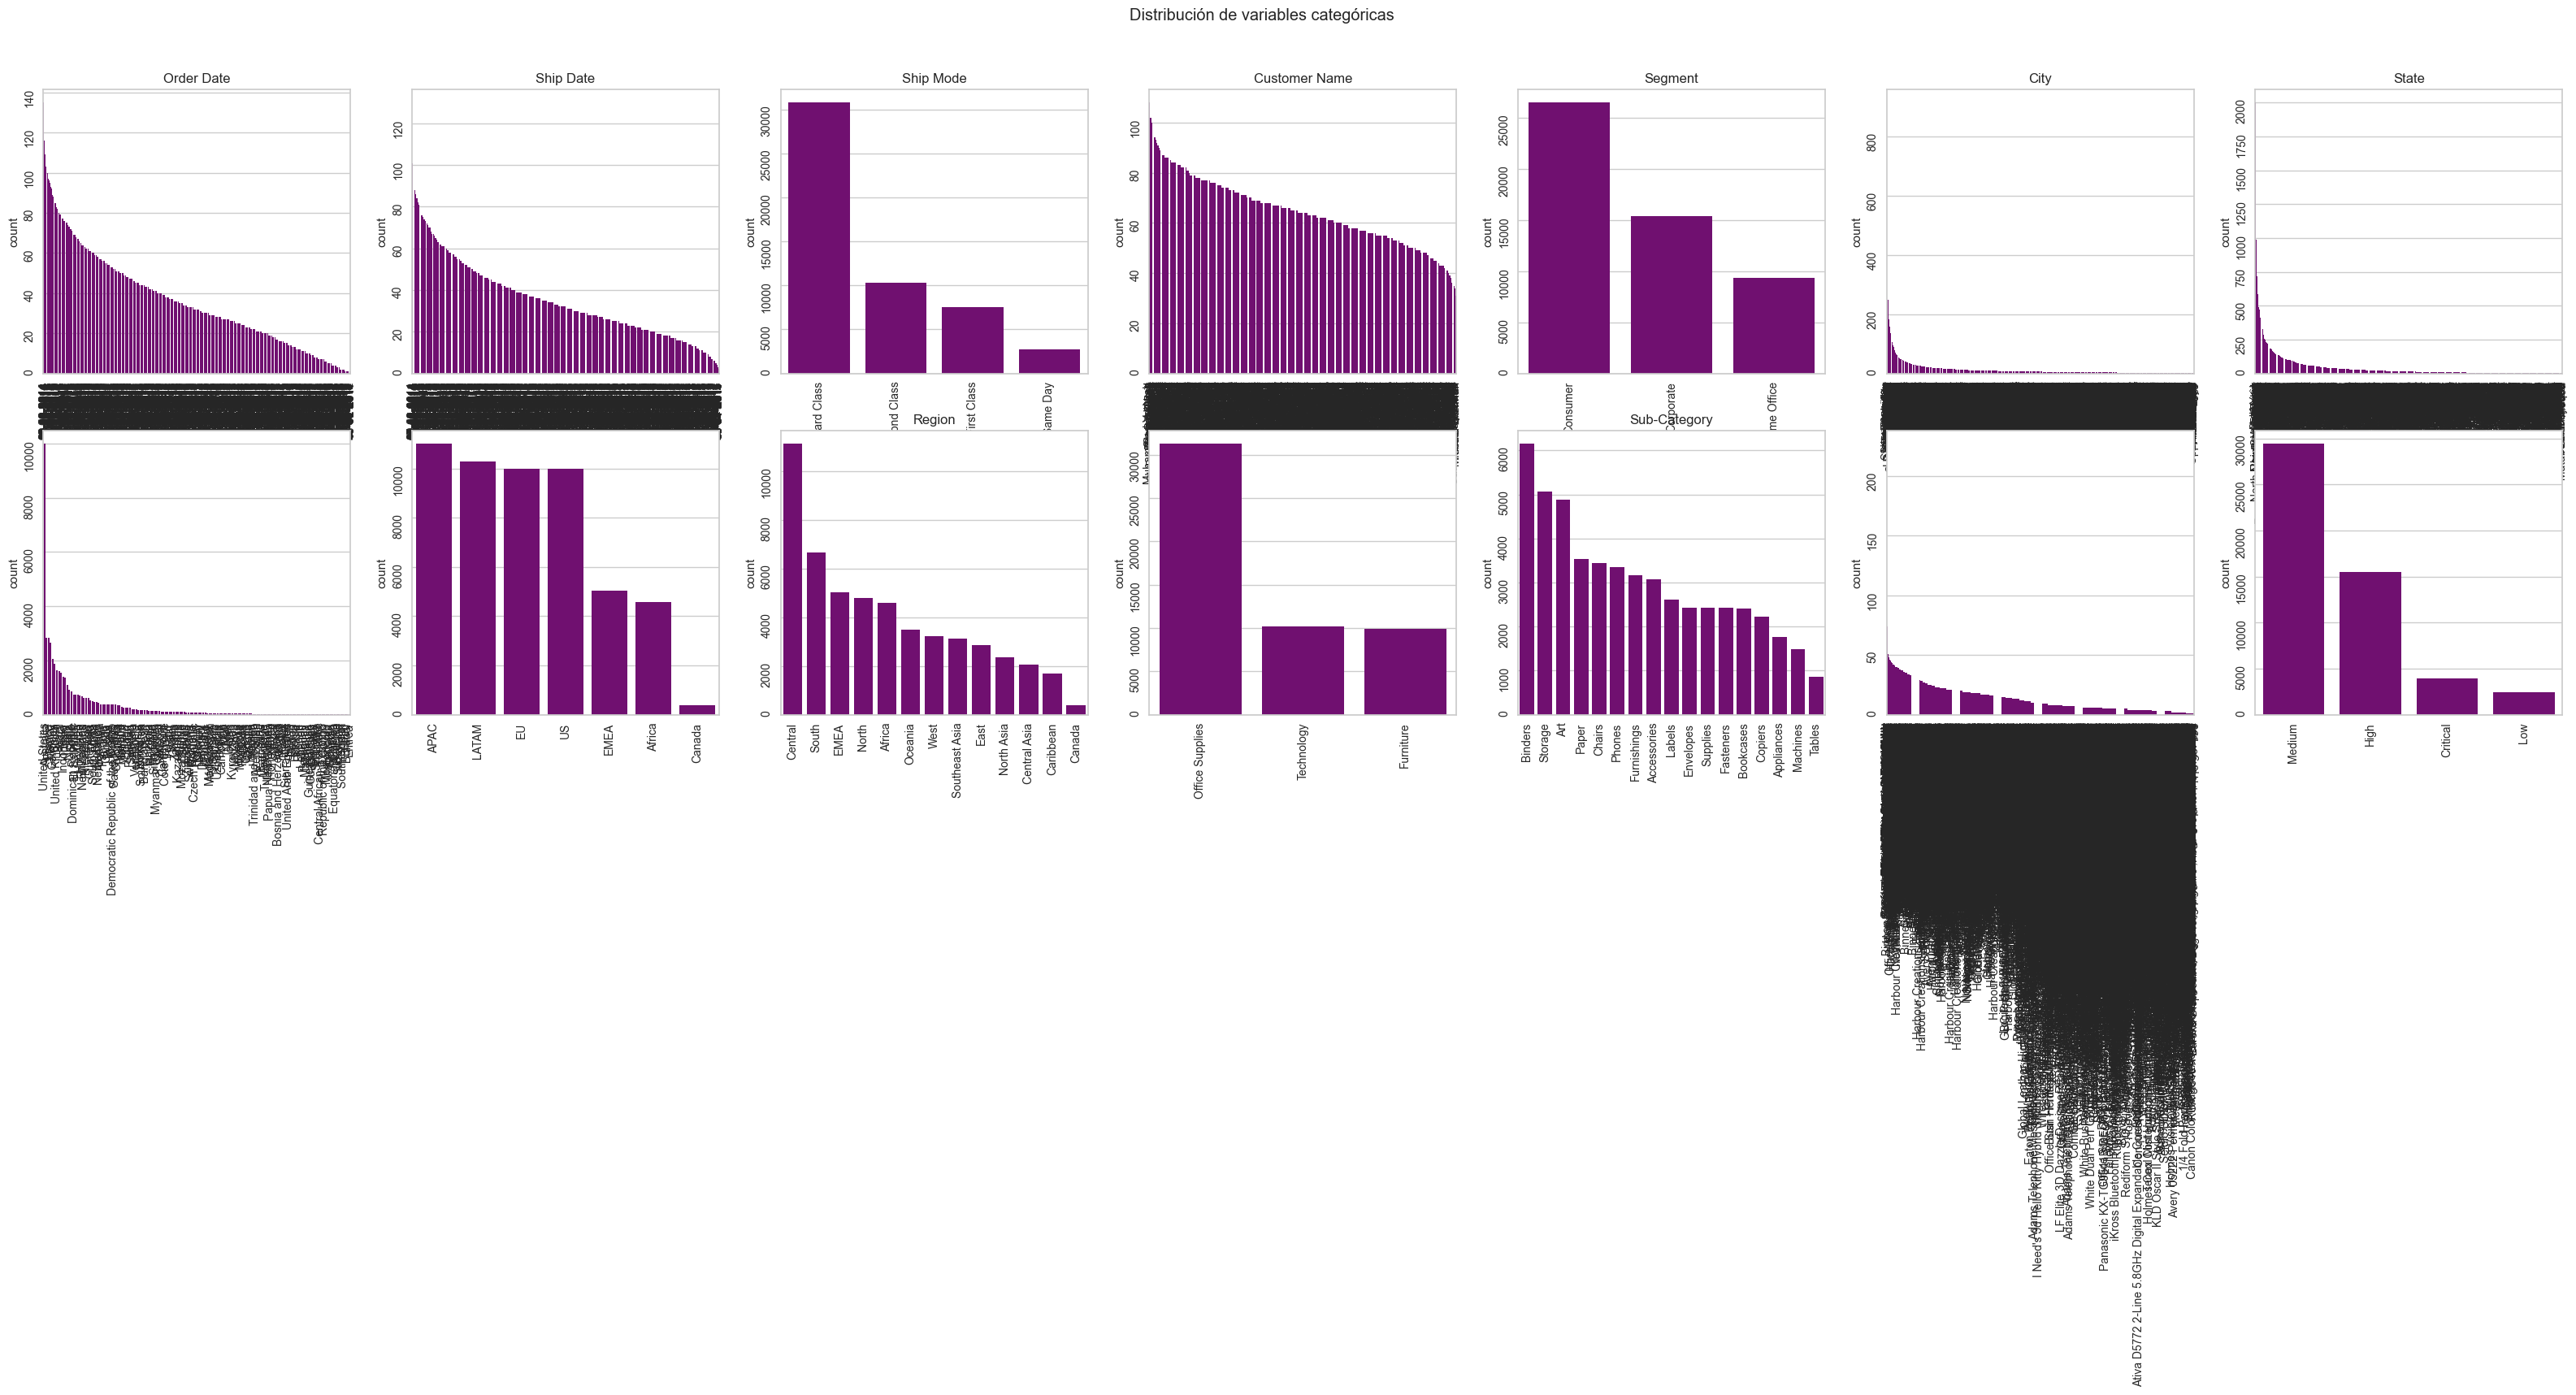

In [103]:
vis.plot_numericas(color='purple')
vis.deteccion_outliers(color='purple')
vis.plot_categoricas(color='purple')

---
---
## Separamos información Clientes y Productos

In [104]:
df_clientes = df.groupby('Customer Name').agg({
    'Segment': 'first',
    'City': 'first',
    'State': 'first',
    'Country': 'first',
    'Market': 'first',
    'Region': 'first',
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum',
    'Discount': 'mean',
    'Shipping Cost': 'mean',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Num Orders'}).reset_index().sort_values(by='Profit', ascending=False)

display(HTML('<h1>20 Clientes que más veneficio nos dan</h1>'))
df_clientes[:20]

,Customer Name,Segment,City,State,Country,Market,Region,Sales,Quantity,Profit,Discount,Shipping Cost,Num Orders
731,Tamara Chand,Corporate,Lafayette,Indiana,United States,US,Central,37457.33,271,8672.90,0.18,28.73,88
623,Raymond Buch,Consumer,Cairns,Queensland,Australia,APAC,Oceania,29602.14,262,8453.05,0.08,29.36,71
672,Sanjit Chand,Consumer,Minneapolis,Minnesota,United States,US,Central,26521.13,244,8205.38,0.15,32.14,69
335,Hunter Lopez,Consumer,Hobart,Tasmania,Australia,APAC,Oceania,30243.57,207,7816.57,0.12,37.26,53
88,Bill Eplett,Home Office,Morelia,Michoacán,Mexico,LATAM,North,28479.17,411,7410.01,0.08,26.43,102
323,Harry Marie,Corporate,Springfield,Missouri,United States,US,Central,28476.94,313,6958.29,0.16,28.47,85
727,Susan Pistek,Consumer,Bangkok,Bangkok,Thailand,APAC,Southeast Asia,29020.60,235,6484.41,0.14,36.49,68
542,Mike Gockenbach,Consumer,Lubumbashi,Katanga,Democratic Republic of the Congo,Africa,Africa,23377.07,185,6458.68,0.20,32.98,51
6,Adrian Barton,Consumer,Detroit,Michigan,United States,US,Central,25123.18,265,6417.28,0.21,34.26,77
758,Tom Ashbrook,Home Office,New York City,New York,United States,US,East,40488.07,284,6311.98,0.09,35.12,80


In [105]:
df_productos = df.groupby('Product Name').agg({
    'Category': pd.Series.mode,
    'Sub-Category': pd.Series.mode,
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum',
    'Discount': 'mean',
    'Shipping Cost': 'mean',
    'unit value': 'mean',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Num Orders'}).reset_index().sort_values(by='Profit', ascending=False)

display(HTML('<h1>20 Productos que más veneficio nos dan</h1>'))
df_productos[:20]

,Product Name,Category,Sub-Category,Sales,Quantity,Profit,Discount,Shipping Cost,unit value,Num Orders
866,Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,61599.82,20,25199.93,0.12,255.26,3079.99,5
970,"Cisco Smart Phone, Full Size",Technology,Phones,76441.53,139,17238.52,0.05,185.93,551.34,38
2415,"Motorola Smart Phone, Full Size",Technology,Phones,73156.30,134,17027.11,0.15,232.04,511.13,38
1926,"Hoover Stove, Red",Office Supplies,Appliances,31663.78,62,11807.97,0.07,232.58,512.89,15
3098,"Sauder Classic Bookcase, Traditional",Furniture,Bookcases,39108.30,113,10672.07,0.12,141.51,352.05,29
1714,"Harbour Creations Executive Leather Armchair, ...",Furniture,Chairs,50121.52,142,10427.33,0.18,167.90,342.73,39
2501,"Nokia Smart Phone, Full Size",Technology,Phones,71904.56,147,9938.20,0.14,167.08,490.61,47
971,"Cisco Smart Phone, with Caller ID",Technology,Phones,43127.50,85,9786.64,0.15,164.20,496.66,27
2502,"Nokia Smart Phone, with Caller ID",Technology,Phones,47877.79,96,9465.33,0.15,221.71,498.53,24
589,"Belkin Router, USB",Technology,Accessories,23470.41,110,8955.02,0.10,78.61,209.60,32


### Salvado de datos agrupados

In [106]:
df_clientes.to_pickle(f"{DATOS_RUTA_TRATADOS}/info_clientes.pkl")
df_productos.to_pickle(f"{DATOS_RUTA_TRATADOS}/info_productos.pkl")